1. Замерьте время вычисления чисел от 0 до 1 из равномерного распределения с помощью модулей random и numpy, изобразите зависимость времени вычисления от количества вычисляемых чисел для них. Другими словами - по x идёт то, сколько чисел за прогон вы взяли от 0 до 1, а по y - время, которое это заняло для random и numpy.



In [45]:
import random 
import numpy as np
import time
import pandas as pd
import seaborn as sns

<AxesSubplot:xlabel='number of times', ylabel='time to generate numbers, sec'>

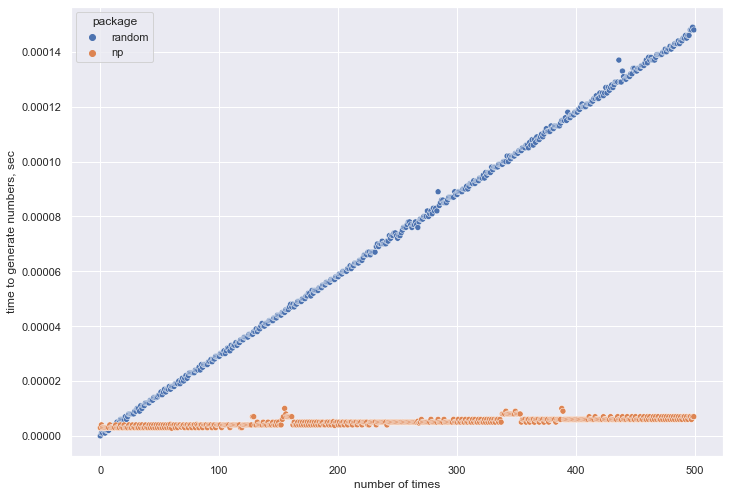

In [47]:
size = 500
random_times = []
np_times = []

for number_of_numbers in range(size): 
    time1 = time.time()
    for number_of_loops in range(1000):
        for number in range (number_of_numbers):
            random.uniform(0, 1)
    time2 = time.time()
    time_dif = time2-time1
    random_times.append((number_of_numbers, time_dif/1000))


for number_of_numbers in range(size):
    time1 = time.time()
    for number_of_loops in range(1000):
        np.random.uniform(0, 1, size = number_of_numbers)
    time2 = time.time()
    time_dif = time2-time1
    np_times.append((number_of_numbers, time_dif/1000))

time_data = np.column_stack((np.array(random_times), np.array(np_times)[0:,1]))
time_df = pd.DataFrame(columns=['number of times', 'random', 'np'], data=time_data)
time_m = pd.melt(time_df, id_vars=['number of times'], value_vars=['random', 'np'])
time_m = time_m.rename(columns = {'variable': 'package', 'value': 'time to generate numbers, sec'}, inplace = False)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(data=time_m, x = 'number of times', y = 'time to generate numbers, sec', hue = 'package')


2. Сделайте функцию для проверки является ли список отсортированным (без использования sorted или sort). Затем реализуйте monkey sort, а потом визуализируйте следующее: распределение времени работы алгоритма от размера сортируемого списка. То есть по x идёт размер массива, а по y - среднее время нескольких прогонов и их отклонение (или дисперсия)

<AxesSubplot:xlabel='list_size', ylabel='time, s'>

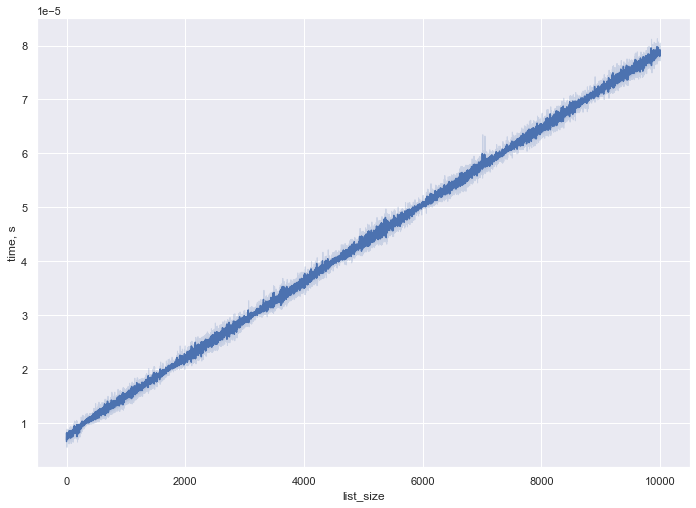

In [74]:
def is_sorted(some_list): 
    for i in range(1, len(some_list)): 
        if some_list[i-1]>some_list[i]: 
            return False
    return True

def bogosort (some_list): 
    while not is_sorted(some_list): 
        np.random.shuffle(some_list)
    return(some_list)

bogo_times = []

for number_of_values in range(100):
    for list_size in range(1000): 
        time1 = time.time()
        for number_of_loops in range(100):
            generated_list = np.random.randint(100, size = list_size)
        time2 = time.time()
        time_dif = time2-time1
        bogo_times.append((list_size, time_dif/100))
time_data = np.array(bogo_times)
sns.set(rc={'figure.figsize':(15,8.27)})
time_df = pd.DataFrame(columns=['list_size', 'time, s'], data=time_data)
sns.lineplot(data=time_df, x = 'list_size', y = 'time, s')

3. Визуализируйте random walk (случайная прогулка, да)) в 2-мерном пространстве, где вы начинаете в (0, 0) и можете перемещаться вверх, вниз, вправо и влево Как визуализировать - скаттерплот, где по x - x, а по y - y


<AxesSubplot:xlabel='x', ylabel='y'>

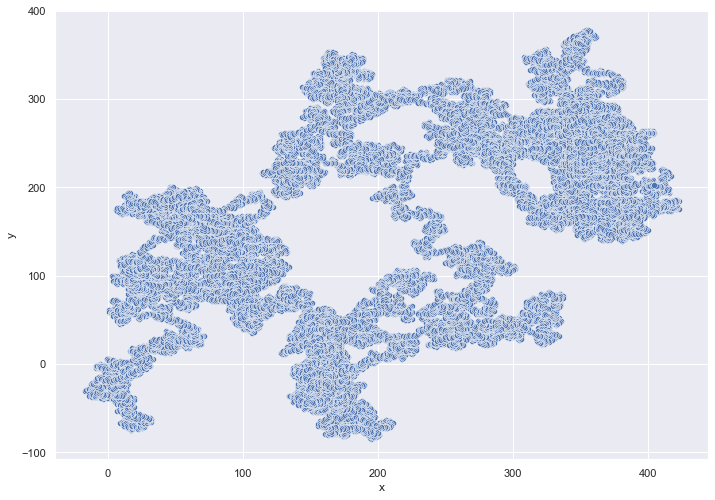

In [48]:
x = [0]
y = [0]
steps = [-1,1]
for i in range (1,100000): 
    stepx = np.random.choice(steps, p=[0.5, 0.5])
    stepy = np.random.choice(steps, p=[0.5, 0.5])
    x.append(x[i-1]+stepx)
    y.append(y[i-1]+stepy)
coords = np.column_stack((np.array(x), np.array(y)))
coords_df = pd.DataFrame(columns=['x', 'y'], data=coords)

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(data = coords_df, x = 'x', y= 'y')

4. Сгенерируйте и нарисуйте треугольник Серпинского, подсказки в прикреплённых ссылках

<AxesSubplot:xlabel='x', ylabel='y'>

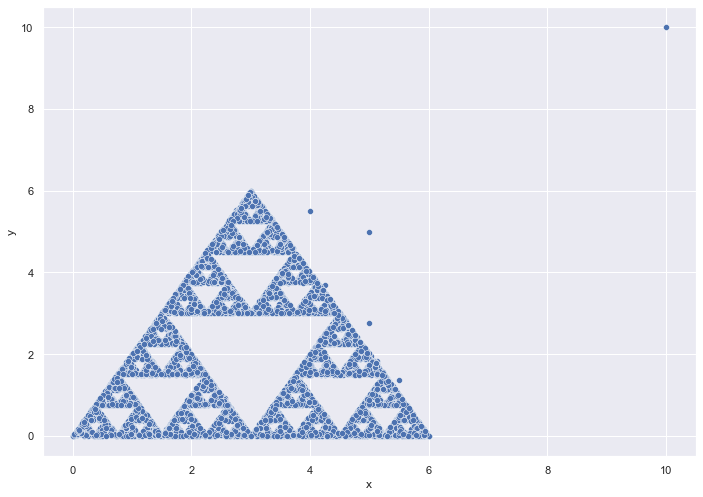

In [86]:
#### points = ['a', 'b', 'c']
edges = {'a': (0,0), 'b':(6,0), 'c':(3,6)}
x = [0,6,3,10]
y = [0,0,6,10]
start = (1,1)
for i in range(4, 10000):
    point_to_move = np.random.choice(points, p=[1/3, 1/3, 1/3])
    x.append((edges[point_to_move][0]+x[i-1])/2)
    y.append((edges[point_to_move][1]+y[i-1])/2)
    
coords = np.column_stack((np.array(x), np.array(y)))
coords_df = pd.DataFrame(columns=['x', 'y'], data=coords)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(data = coords_df, x = 'x', y= 'y')    

5. Сделайте программу, получающую на вход текст, и выдающую этот же текст со следующими изменениями - буквы во всех словах кроме первой и последней перемешаны. Для простоты пока будем считать, что пунктуации нет. Пример: "По рзеузльаттам илссоевадний одонго анлигсйокго унвиертисета, не иеемт занчнеия, в каокм проякде рсапжоолены бкувы в солве. Галовне, чотбы преавя и пслонедяя бквуы блыи на мсете. осатьлыне бкувы мгоут селдовтаь в плоонм бсепордяке, все-рвано ткест чтаитсея без побрелм. Пичрионй эгото ялвятеся то, что мы не чиаетм кдаужю бкуву по отдльенотси, а все солво цлиеком."

In [50]:
def text_shuffle(words):
    new_words = []
    for word in words.split(' '):
        if len(word)>3:
            middle = [letter for letter in word[1:-1]]
            np.random.shuffle(middle)
            new_word = word[0]+''.join(middle)+word[-1]
            new_words.append(new_word)
        else: 
            new_words.append(word)
    return ' '.join(new_words)

words1 = input()
text_shuffle(words1)

Сделайте программу получающую на вход текст и выдающую этот же текст со следующими изменениями буквы во всех словах кроме первой и последней перемешаны Для простоты пока будем считать что пунктуации нет


'Садетлйе пграомрму пачоущлуюю на вход ткест и вадюыщую этот же тсект со сщюудмеили имяезиенмни бвукы во весх солвах кмрое певорй и пдснлееой пнмееашреы Для птртоосы пока буедм счиатть что птукацунии нет'